# 캡스톤디자인 교과목에 대한 요인 분석: H대 산업경영공학사례

## 서론

- 캡스톤디자인 교과목 : 프로젝트기반 학습모형으로 산업현장의 실제 문제를 학부 교육과정에 기반하여 학생들의 자발적 팀에 의해서 수행되는 학습자 주도형 학습과정

- 분석 배경 : 지난 20년간 진행된 H대 산업격영공학과의 캡스톤디자인 프로젝트는 학생의 역량을 증진시키고 다양한 성과를 이끌어냄

    하지만, 그 간의 수강생 설문조사와 데이터를 분석하였을 때, 일정한 방향성이 존재하지 않음

    따라서, 프로젝트를 수행함으로써 증진된 역량을 프로젝트 통과 여부와 프로젝트 학점을 통해 알아 보고자 함

- 분석 목적 : 캡스톤디자인 프로젝트를 성공적으로 수행하기 위한 역량을 분석을 통해 알아봄

### 캡스톤디자인 교과목의 운영 방식과 절차 

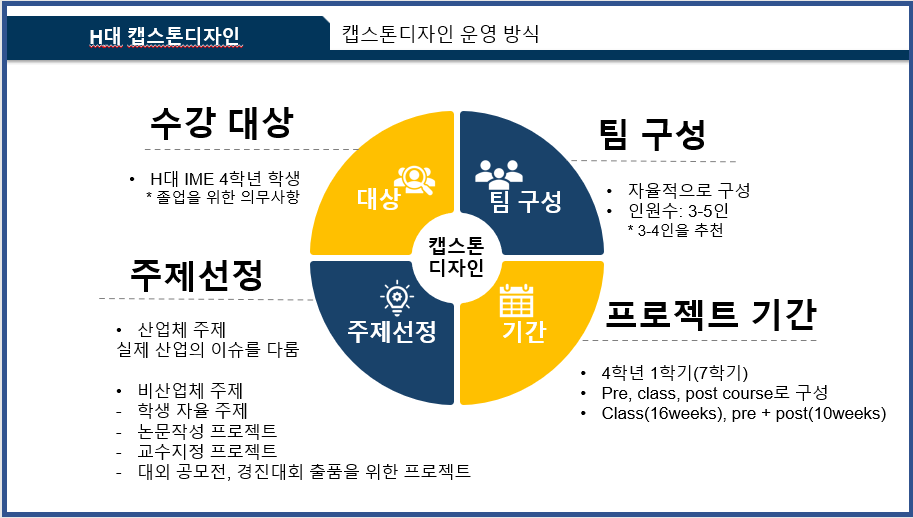

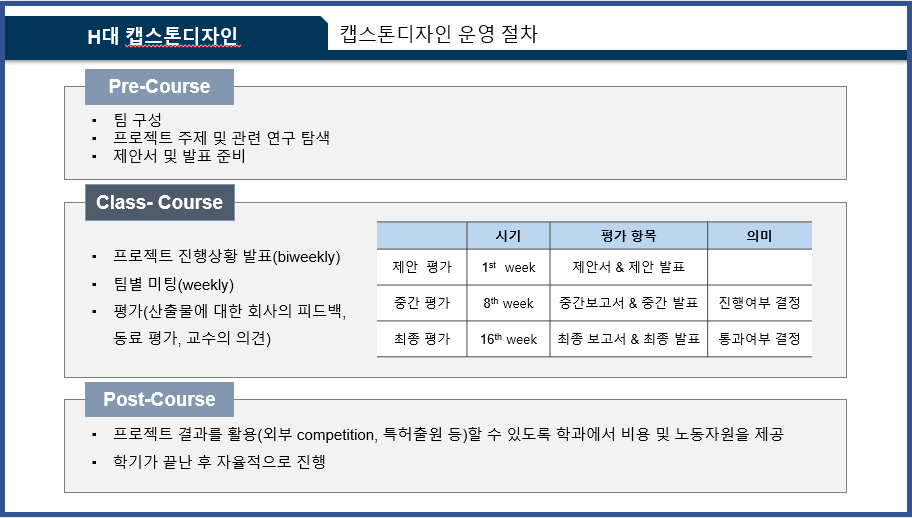

## Data

### 코드

In [1]:
import pandas as pd
m1 = pd.read_excel('/content/drive/MyDrive/Cots_project/Model1.xlsx')
m1.head()

,졸플연도,(2019년 졸플) 학번,팀번호,성별,평점평균,이수전공\n학점수,이중전공 \n분야(18명/53명),이중전공\n이수학점수,이중전공\n평점평균,부전공\n분야,부전공\n이수학점수,부전공\n평균평점,Pass/Fail,팀 등수,캡스톤(3학점) 평점,적극성,의사소통,팀워크,주제
0,2016,200002876,10,남,4.030000,60.0,NaN,NaN,NaN,중국어통번역학,17.0,3.56,Pass,3,4.5,4.5,3.25,3.5,0
1,2013,200500906,6,남,2.830000,57.0,NaN,NaN,NaN,국제경영,24.0,2.44,Pass,4,4.0,9.0,9.00,9.0,1
2,2013,200600868,8,남,3.140000,51.0,NaN,NaN,NaN,NaN,NaN,NaN,Fail,6,2.0,9.0,9.00,9.0,1
3,2014,200601260,1,남,2.610000,57.0,NaN,NaN,NaN,경제학,21.0,4.00,Fail,10,2.0,9.0,9.00,9.0,1
4,2013,200603428,9,남,3.094068,57.0,NaN,NaN,NaN,방송영상,15.0,3.90,Pass,2,4.5,9.0,9.00,9.0,1


In [2]:
# 결측치 확인
m1.isnull().sum()

졸플연도                    0
(2019년 졸플) 학번           0
팀번호                     0
성별                      0
평점평균                    2
이수전공\n학점수               2
이중전공 \n분야(18명/53명)    226
이중전공\n이수학점수           226
이중전공\n평점평균            226
부전공\n분야                83
부전공\n이수학점수             60
부전공\n평균평점              93
Pass/Fail               0
팀 등수                    0
캡스톤(3학점) 평점             0
적극성                     0
의사소통                    0
팀워크                     0
주제                      0
dtype: int64

In [3]:
# 데이터 타입 확인
m1.dtypes

졸플연도                    int64
(2019년 졸플) 학번           int64
팀번호                     int64
성별                     object
평점평균                  float64
이수전공\n학점수             float64
이중전공 \n분야(18명/53명)     object
이중전공\n이수학점수           float64
이중전공\n평점평균            float64
부전공\n분야                object
부전공\n이수학점수            float64
부전공\n평균평점             float64
Pass/Fail              object
팀 등수                   object
캡스톤(3학점) 평점           float64
적극성                   float64
의사소통                  float64
팀워크                   float64
주제                      int64
dtype: object

## Feature Engineering

### 코드

In [4]:
# Pass/Fail 값 변환
m1['Pass/Fail'].unique()
m1.replace(['Pass','Fail ','Fail'],[1,0,0], inplace = True)
m1['Pass/Fail'].unique()

array([1, 0])

In [5]:
from re import A
# 연도별 팀 번호 = 'code'
m1['졸플연도'] = m1['졸플연도'].astype(str)
m1['팀번호'] = m1['팀번호'].astype(str)
m1['code'] = m1['졸플연도'].str.cat(m1['팀번호'], sep = '_')
m1.sort_values('code')
# m1
# 성별 값 변환
m1.replace(['남','여'],[0,1], inplace = True)
m1['성별']

# 학생 개인의 이중전공 여부
m1['이중전공 \n분야(18명/53명)'] = m1['이중전공 \n분야(18명/53명)'].fillna(0)
m1['다학제성_개인'] = m1['이중전공 \n분야(18명/53명)'] == 0
m1['다학제성_개인'].replace([True,False],[0,1], inplace = True)
m1['다학제성_개인']

# 팀내 이중전공자 수
a = pd.DataFrame(m1.groupby(['code']).다학제성_개인.sum())
a = a.rename(columns = {'다학제성_개인':'다학제성_팀'}).reset_index()
m1 = pd.merge(m1,a,on = 'code')

# 팀 구성원 수
b = pd.DataFrame(m1.groupby(['code'])['code'].count())
b = b.rename(columns = {'code':'팀사이즈'}).reset_index()
m1 = pd.merge(m1,b,on = 'code')

# 팀 내 성 비율 (남성 기준)
c = pd.DataFrame(m1.groupby(['code','성별'])['성별'].sum())
c = c.rename(columns = {'성별':'남성수'}).reset_index()
c = c[c['성별'] == 1].drop(labels = '성별',axis=1)
m1 = pd.merge(m1,c,on = 'code')
m1['남성비율'] = m1['남성수'] / m1['팀사이즈']

In [6]:
col = ['Pass/Fail','캡스톤(3학점) 평점','평점평균','다학제성_개인','팀사이즈','다학제성_팀',
       '주제','성별', '남성비율','적극성','의사소통','팀워크']
model1 = m1[col]
model1 = model1.rename(columns = {
    'Pass/Fail' : 'Cap_pf',
    '캡스톤(3학점) 평점' : 'Cap_score',
    '평점평균' : 'GPA',
    '다학제성_개인' : 'secma_indi',
    '팀사이즈' : 'team_size',
    '다학제성_팀' : 'secma_team',
    '주제' : 'topic',
    '성별' : 'gender',
    '남성비율' : 'g_ratio',
    '적극성' : 'initiative',
    '팀워크' : 'teamwork',
    '의사소통' : 'communication'
})

In [7]:
model1.head()

,Cap_pf,Cap_score,GPA,secma_indi,team_size,secma_team,topic,gender,g_ratio,initiative,communication,teamwork
0,1,4.5,4.03,0,5,2,0,0,0.2,4.50,3.25,3.5
1,1,4.5,4.08,0,5,2,0,0,0.2,4.00,3.75,4.0
2,1,4.5,3.52,0,5,2,0,0,0.2,4.50,4.00,3.5
3,1,4.5,3.54,1,5,2,0,0,0.2,3.75,3.75,3.5
4,1,4.5,2.73,1,5,2,0,1,0.2,4.00,4.25,5.0


### 변수 설명

In [25]:
m1.head()

,졸플연도,(2019년 졸플) 학번,팀번호,성별,평점평균,이수전공\n학점수,이중전공 \n분야(18명/53명),이중전공\n이수학점수,이중전공\n평점평균,부전공\n분야,...,적극성,의사소통,팀워크,주제,code,다학제성_개인,다학제성_팀,팀사이즈,남성수,남성비율
0,2016,200002876,10,0,4.03,60.0,0,NaN,NaN,중국어통번역학,...,4.50,3.25,3.5,0,2016_10,0,2,5,1,0.2
1,2016,201100347,10,0,4.08,60.0,0,NaN,NaN,국제경영학,...,4.00,3.75,4.0,0,2016_10,0,2,5,1,0.2
2,2016,201101559,10,0,3.52,57.0,0,NaN,NaN,국제경영학,...,4.50,4.00,3.5,0,2016_10,0,2,5,1,0.2
3,2016,201103347,10,0,3.54,50.0,일본어통번역학,31.0,3.35,NaN,...,3.75,3.75,3.5,0,2016_10,1,2,5,1,0.2
4,2016,201300550,10,1,2.73,60.0,말레이인도네시아어통번역학,20.0,3.20,NaN,...,4.00,4.25,5.0,0,2016_10,1,2,5,1,0.2


- Cap_pf : 캡스톤디자인 교과목 통과여부  
    Pass = 1, Fail = 0 

- Cap_score : 캡스톤디자인 교과목 학점  
    0 ~ 4.5 

- GPA : 전체 평균 학점  
    0 ~ 4.5 

- secma_indi(Second Major_Individual) : 학생의 이중전공 수강 여부  
    이중전공 = 1, 부전공 및 전공심화 = 0

- secma_team(Second Major_Team) : 팀 내 이중전공 생 수  

- team_size : 팀 인원수  

- topic : 팀의 프로젝트 주제  (기업주제는 실제 산업의 이슈와 관련된 주제, 자유주제는 그외의 주제)  
    자유주제 = 0, 기업주제 = 1  

- gender : 성별  
    여 = 0, 남 = 1  

- g_ratio : 팀 내 성별비율 (남성비율)  



♦ 하위의 독립변수들은 프로젝트 마감 후 스스로의 평가를 리커트척도 (1~5)로 설문하였고 이들의 평균값을 가진다. (1 ~ 5)     



- initiative : 적극성  
    - 캡스톤디자인프로젝트/실습을 수강하는 본인은 학습에 열의가 있었다고 생각합니까?  
    - 캡스톤디자인프로젝트 팀의 팀장이나 서기 등, 팀 내 직책을 적극적으로 수행했다고 생각합니까?  
    - 캡스톤디자인프로젝트의 팀 활동에 본인은 능동적이고 적극적으로 참여 했다고 생각합니까?  
    - 캡스톤디자인프로젝트 수행시 본인의 문제를 교수자들이나 다른 수강생들에게 도움 혹은 조언을 적극적으로 요청했다고 생각합니까?
- teamwork : 팀워크
     - 캡스톤디자인프로젝트 팀 내 학생간의 지식교환 및 토의가 활발했다고 생각합니까?  
     - 본 강좌는 다른 수강생들과 친밀한 관계를 유지 혹은 확대하는 데 도움이 되었다고 생각합니까?
- communication : 의사소통  
     - 본인은 캡스톤디자인프로젝트에서 교수자들과의 의사소통에 적극적으로 참여했다고 생각합니까?  
     - 본인은 캡스톤디자인프로젝트 팀 내의 지식교환 및 토의가 활발하게 참여했다고 생각합니까?  
     - 본인은 캡스톤디자인프로젝트 팀 간의 지식교환 및 토의가 활발하게 참여했다고 생각합니까?  
     - 본인은 캡스톤디자인프로젝트/실습 강좌에서 다른 수강생들과 친밀한 관계를 유지 혹은 확대 했다고 생각합니까?

## EDA

### 코드

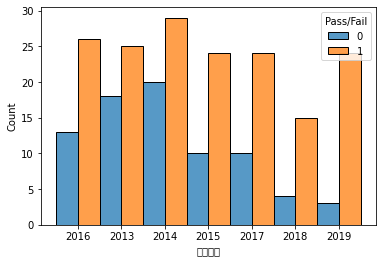

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

m1['졸플연도'].sort_values()
sns.histplot(x = m1['졸플연도'], hue = m1['Pass/Fail'],multiple='dodge');

## 분석

##### 설치코드 (카테고리 인코더)

In [9]:
!pip install category_encoders==2.*
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Cap_pf에 대한 로그회귀 분석

#### 코드

In [10]:
model1.isnull().sum()
model1 = model1.fillna(9)

In [11]:
# 타겟과 피쳐 특성 분리
target1 = ['Cap_pf']
target2 = ['Cap_score']
features = ['GPA','secma_indi','secma_team','team_size','topic','gender','g_ratio','initiative','teamwork','communication']

# 데이터가 매우 적으므로 train과 test data를 나누지 않는다.
X = model1[features]
y = model1[target1]

In [26]:
# 기준모델
y.value_counts(normalize = True)[1]

0.6816326530612244

##### 코드

In [13]:
import sklearn
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import RandomizedSearchCV
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cate_col = ['secma_indi','secma_team','topic','gender']
pipe1 = Pipeline([
    # ('one',OneHotEncoder(cols = cate_col, use_cat_names = True)),
    # ('pre',StandardScaler()),
    ('log',LogisticRegression())
])

dists = [{
        # 'feature_selection_k':[7,10]
         'log__C':[0.01,0.1,1.10]
         , 'log__penalty':['l1','l2']
         , 'log__solver' : ['liblinear']
}]

clf = RandomizedSearchCV(
    pipe1,
    random_state=42,
    n_iter = 10,
    cv = 10,
    scoring='accuracy',
    verbose = 1,
    n_jobs = -1,
    param_distributions = dists
)
clf.fit(X,y)
# clf.get_params().keys()

Fitting 10 folds for each of 6 candidates, totalling 60 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('log', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions=[{'log__C': [0.01, 0.1, 1.1],
                                         'log__penalty': ['l1', 'l2'],
                                         'log__solver': ['liblinear']}],
                   random_state=42, scoring='accuracy', verbose=1)

#### 정확도

In [27]:
# print(clf.best_params_)
print(clf.best_score_)

0.7270000000000001


In [15]:
import statsmodels.api as sm

p1 = sm.Logit.from_formula("Cap_pf ~ GPA+secma_indi+secma_team+team_size+topic+gender+g_ratio+initiative+teamwork+communication", data = model1)
# p1 = sm.Logit.from_formula("Cap_pf ~ GPA+secma_team+team_size+topic+g_ratio+initiative+teamwork+communication", data = model1)
# p1 = sm.Logit.from_formula("Cap_pf ~ GPA+secma_indi+secma_team+team_size+topic+gender+g_ratio+initiative+teamwork", data = model1)
# p1 = sm.Logit.from_formula("Cap_pf ~ topic+g_ratio", data = model1)
result = p1.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.565539
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Cap_pf   No. Observations:                  245
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                           10
Date:                Tue, 24 May 2022   Pseudo R-squ.:                 0.09605
Time:                        07:31:56   Log-Likelihood:                -138.56
converged:                       True   LL-Null:                       -153.28
Covariance Type:            nonrobust   LLR p-value:                  0.001055
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5908      1.608      0.989      0.323      -1.562       4.743
GPA               0.1021      0.229      0.445      0.656      -0.348       0.552
secma_indi       -0.0164      0.396     -0.041      0.967      -0.792       0.759
secma_team       -0.2852      0.188     -1.515      0.130      -0.654       0.084
team_size         0.0357      0.232      0.154      0.878      -0.419       0.491
topic            -0.1407      0.055     -2.552      0.011      -0.249      -0.033
gender           -0.1641      0.329     -0.498      0.618      -0.810       0.482
g_ratio           1.8461      0.891      2.073      0.038       0.100       3.592
initiative       -0.3576      0.390     -0.918      0.359      -1.121       0.406
teamwork          0.1398      0.268      0.521      0.602      -0.386       0.666
communication    -0.0343      0.415     -0.083      0.934      -0.847       0.778
=================================================================================
"""

- p < 0.05 : topic(+),  g_ratio(남성의 비율이 높을 수록)

- 즉, 주제가 산업관련 주제이고 팀 내 남성의 비율이 높을 수록 통과 확률이 올라간다.

##### 코드

In [16]:
y_pred = result.predict(model1) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(model1.Cap_pf, y_pred)

array([[ 27,  51],
       [ 10, 157]])

In [17]:
from sklearn.metrics import classification_report

print(classification_report(model1.Cap_pf, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.35      0.47        78
           1       0.75      0.94      0.84       167

    accuracy                           0.75       245
   macro avg       0.74      0.64      0.65       245
weighted avg       0.75      0.75      0.72       245



#### ROC

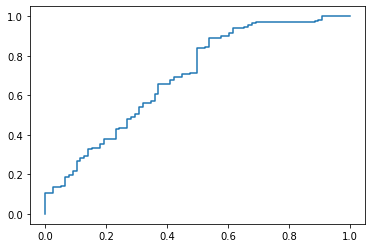

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(model1.Cap_pf, result.predict(model1))
plt.plot(fpr, tpr)
plt.show()

##### 시도

In [19]:
pipe2 = Pipeline([
    ('pre',OneHotEncoder(cols = cate_col, use_cat_names = True)),
    ('log',LogisticRegression())
])
pipe2.named_steps

{'log': LogisticRegression(),
 'pre': OneHotEncoder(cols=['secma_indi', 'secma_team', 'topic', 'gender'],
               use_cat_names=True)}

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(model1, train_size=0.80, test_size=0.20,
                               stratify=model1[target1],random_state=42)
train.shape, test.shape

((196, 12), (49, 12))

In [21]:
X_train = train[features]
y_train = train[target1]
X_test = test[features]
y_test = test[target1]

In [22]:
pipe2.fit(X_train,y_train)
pipe2.score(X_test,y_test)

0.7346938775510204

In [23]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe2.named_steps['log'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=42
)

X_test_transformed = pipe2.named_steps['pre'].transform(X_test)

permuter.fit(X_test_transformed,y_test);

feature_names = X_test_transformed.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0653 ± 0.0653,initiative
0.0245 ± 0.0400,secma_team_3.0
0.0163 ± 0.0305,communication
0.0163 ± 0.0305,topic_9.0
0.0122 ± 0.0663,topic_0.0
0.0122 ± 0.0200,GPA
0.0082 ± 0.0416,g_ratio
0.0041 ± 0.0400,teamwork
0.0041 ± 0.0305,gender_0.0
0.0041 ± 0.0163,team_size


### Cap_score에 대한 다중회귀 분석

In [24]:
import statsmodels.formula.api as sm
# from statsmodels.sandbox.regression.predstd import wls\_prediction\_std

# p2 = sm.ols(formula = "Cap_score ~ GPA+secma_indi+secma_team+team_size+topic+gender+g_ratio+initiative+teamwork+communication", data = model1)
p2 = sm.ols(formula = "Cap_score ~ GPA+topic+g_ratio+initiative+teamwork", data = model1)
# p2 = sm.ols(formula = "Cap_score ~ GPA+secma_team+team_size+topic+g_ratio+initiative+teamwork", data = model1)
result = p2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Cap_score   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     10.73
Date:                Tue, 24 May 2022   Prob (F-statistic):           2.56e-09
Time:                        07:31:59   Log-Likelihood:                -379.23
No. Observations:                 245   AIC:                             770.5
Df Residuals:                     239   BIC:                             791.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5041      0.482      7.266      0.000       2.554       4.454
GPA            0.2207      0.108      2.039      0.043       0.007       0.434
topic         -0.0391      0.027     -1.432      0.153      -0.093       0.015
g_ratio        0.8862      0.360      2.464      0.014       0.178       1.595
initiative    -0.4558      0.125     -3.654      0.000      -0.702      -0.210
teamwork       0.2784      0.115      2.429      0.016       0.053       0.504
==============================================================================
Omnibus:                       12.155   Durbin-Watson:                   0.683
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.842
Skew:                          -0.559   Prob(JB):                      0.00163
Kurtosis:                       3.078   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 독립변수의 변화에 결과가 큰 차이가 없음
- 통계값
   - Adj. R-squared:	0.150
   - Prob (F-statistic):	4.65e-07
   - p < 0.05 이하 : GPA(+), g_ratio(남성), initiative(-), teamwork(+)

🎈 사회과학 분야에서의 통계량
- 사회과학에서의 연구는 모든 변수를 완전히 통제할 수 없다는 점에서 완벽한 연구 혹은 예측이 어렵다.
- 설명변수를 모두 포함하지 못한 채 분석을 한다면, 변수들의 관계는 유의하더라도 R2값은 낮을 수 있다. (0.1 ~ 0.3)